# IMPORT LIBS

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

# FUNCTIONS DEF

In [4]:
def create_dataset(data, seq_leght):
    x, y = [], []
    for i in range(len(data) - seq_leght):
        x.append(data[i:i + seq_leght])
        y.append(data[i + seq_leght])
    return np.array(x), np.array(y)

# INTRODUCTION

In [5]:
# Step 1: Data pre-processing

time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
print(time_series)
train_size = int(len(time_series) * 0.6)
train_data, test_data = time_series[:train_size], time_series[train_size:]
print("train_data: ", train_data)
print("test_data: ", test_data)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data:  [1 2 3 4 5 6 7 8 9]
test_data:  [10 11 12 13 14 15]


In [6]:
# Step 2: Data preparation

# We defined the time steps number to the time series
seq_leght = 4

# We created the traingin and test set on 3D format
x_train, y_train = create_dataset(train_data, seq_leght=seq_leght)
x_test, y_test = create_dataset(test_data, seq_leght=seq_leght)

# We printting the datasets on 3D format
print("Conjunto de secuencias de entrenamiento:\n", x_train)
print("Etiquetas de entrenamiento:\n", y_train)
print("Conjunto de secuencias de prueba:\n", x_test)
print("Etiquetas de prueba:\n", y_test)

Conjunto de secuencias de entrenamiento:
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento:
 [5 6 7 8 9]
Conjunto de secuencias de prueba:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba:
 [14 15]


In [7]:
# Step 3: Building the model
model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(seq_leght, 1)))
model.add(Dense(1))

# Step 4: Compiling the model
model.compile(optimizer='adam', loss='mse')

c:\Users\Lenovo\Documents\Talento Tech\IA\TalentoTECH-Repo\Temp\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Step 5: Training the model
history = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 41.6288
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 40.6325
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 39.6466
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 38.6711
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 37.7089
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 36.7658
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 35.8340
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 34.9095
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 33.9898
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 33.0815
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 32.1845
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 31.2993
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 30.4264
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 29.5721
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 28.7307
Epoch 

<Axes: >

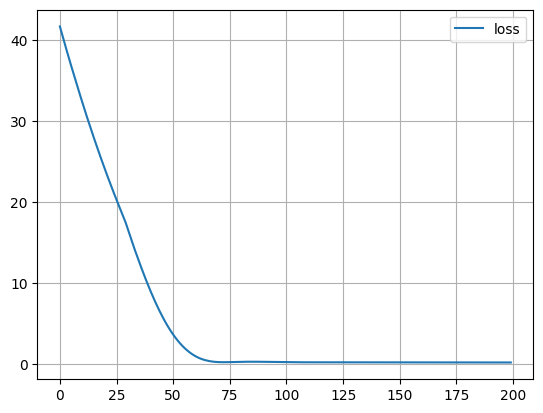

In [9]:
# Step 6: Graphic the training history
pd.DataFrame(history.history).plot(grid=True)

In [10]:
# Step 7: Model evaluation
Evaluacion = model.evaluate(x_test, y_test)
print(Evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 4.8163
4.816274642944336


In [11]:
# Step 8: Prediction
print("x_test: \n", x_test)
print("y_test: \n", y_test)
y_pred = model.predict(x_test)
print("y_pred: \n", y_pred)

x_test: 
 [[10 11 12 13]
 [11 12 13 14]]
y_test: 
 [14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
y_pred: 
 [[16.03433]
 [17.34394]]


# Exercise
Instrucciones:
- Analizar el proceso de preprocesamiento de datos y preparación de datos para LSTM.
- Estudiar la arquitectura del modelo y comprender cómo se configuran las capas.
- Observar el proceso de compilación del modelo y comprender los parámetros utilizados.
- Realizar el entrenamiento del modelo y analizar el historial de entrenamiento obtenido.
- Evaluar el rendimiento del modelo utilizando los datos de prueba y analizar los resultados.
- Realizar predicciones utilizando el modelo entrenado y compararlas con los valores reales.


# RNN WITH LSTM

In [12]:
# Step 1: Data pre-processing

time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
print(time_series)
train_size = int(len(time_series) * 0.6)
train_data, test_data = time_series[:train_size], time_series[train_size:]
print("train_data: ", train_data)
print("test_data: ", test_data)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data:  [1 2 3 4 5 6 7 8 9]
test_data:  [10 11 12 13 14 15]


In [13]:
# We created the traingin and test set on 3D format
x_train, y_train = create_dataset(train_data, seq_leght=seq_leght)
x_test, y_test = create_dataset(test_data, seq_leght=seq_leght)

# We printting the datasets on 3D format
print("Conjunto de secuencias de entrenamiento:\n", x_train)
print("Etiquetas de entrenamiento:\n", y_train)
print("Conjunto de secuencias de prueba:\n", x_test)
print("Etiquetas de prueba:\n", y_test)

Conjunto de secuencias de entrenamiento:
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento:
 [5 6 7 8 9]
Conjunto de secuencias de prueba:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba:
 [14 15]


In [14]:
# Step 3: Building of LSTM Model
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(seq_leght, 1)))
model.add(Dense(1))

c:\Users\Lenovo\Documents\Talento Tech\IA\TalentoTECH-Repo\Temp\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:

# Step 4: Compiling the model
model.compile(optimizer='adam', loss='mse')

In [16]:
# Step 5: Training the model
history = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 81.9552
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 81.0045
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 80.0864
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 79.1998
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 78.3441
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 77.5182
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 76.7214
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 75.9526
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 75.2110
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 74.4956
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 73.8055
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 73.1398
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 72.4975
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 71.8778
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 71.2798
Epoch 

In [17]:
# Step 7: Model evaluation
Evaluacion = model.evaluate(x_test, y_test)
print(Evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 12.3709
12.370903015136719


In [18]:
# Step 8: Prediction
print("x_test: \n", x_test)
print("y_test: \n", y_test)
y_pred = model.predict(x_test)
print("y_pred: \n", y_pred)

x_test: 
 [[10 11 12 13]
 [11 12 13 14]]
y_test: 
 [14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
y_pred: 
 [[17.262884]
 [18.754383]]


Preguntas de comprensión:

1. Qué biblioteca se utiliza para implementar la red neuronal LSTM en
Python?
2. ¿Cuál es el propósito del paso 1 en el código?
3. ¿Qué hace la función create_dataset en el paso 2?
4. ¿Qué significa el parámetro seq_length en la función create_dataset?
5. ¿Por qué es necesario transformar los datos en secuencias en el paso
2?

Ejercicios de exploración:

1. Modifique el tamaño de la serie de tiempo (time_series) y observe
cómo afecta a la predicción del modelo.
2. Experimente con diferentes valores para el parámetro seq_length y
observe cómo afecta al desempeño del modelo.
3. Cambie la arquitectura de la red neuronal LSTM, por ejemplo,
ajustando el número de unidades LSTM o la función de activación,
y observe cómo afecta a la precisión del modelo.
4. Añada capas adicionales a la red neuronal LSTM y compare el
desempeño del modelo con la arquitectura original.
5.Divida los datos de entrenamiento y pruebe de manera diferente
(por ejemplo, 70% para entrenamiento y 30% para prueba) y
observe cómo afecta al desempeño del modelo.

# TIME SERIES WITH RNN LSTM

In [19]:
# Generate data to synthetic  time series
np.random.seed(0)
n_samples = 200
t = np.arange(n_samples)

# Create a synthetic timee series (in this case, crecient)
time_series = 0.1*t + np.random.randn(n_samples)

In [20]:
# Split data
train_size = int(len(time_series) * 0.8)
train_data, test_data = time_series[:train_size], time_series[train_size:]

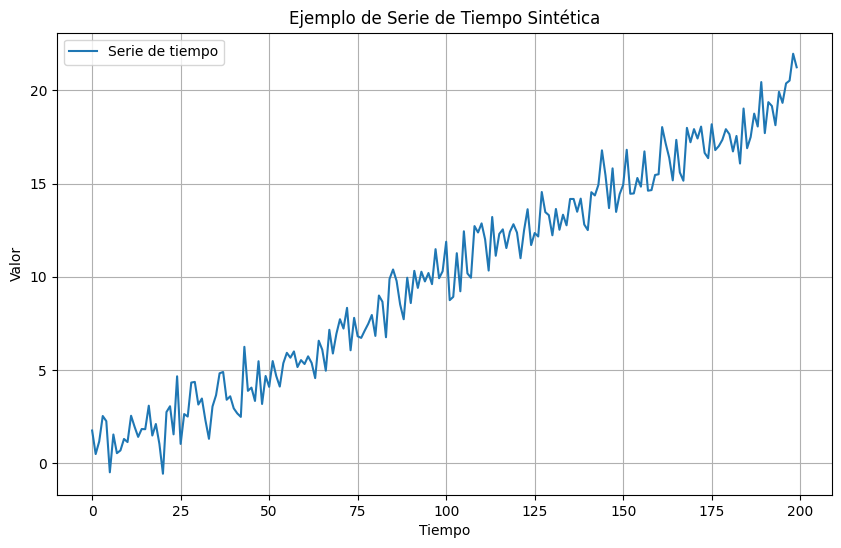

In [21]:
# Grpahic the time series
plt.figure(figsize=(10, 6))
plt.plot(t, time_series, label="Serie de tiempo")
plt.title('Ejemplo de Serie de Tiempo Sintética')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# We transformed our sequence data
# We defined the number of time steps for time series

seq_legth = 16

# We created the training and test set in 3D format
x_train, y_train = create_dataset(train_data, seq_leght=seq_legth)
x_test, y_test = create_dataset(test_data, seq_leght=seq_legth)

In [23]:
# Building LSTM Model
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(seq_legth, 1), return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 76.6826
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6106 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5457 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2802 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7716 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7806 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4899 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5671 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2578 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1162 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1274 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9948 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2029 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1134 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0160 
Epoch 16/100
5/5 ━━

In [25]:
# Evaluation the model
eval = model.evaluate(x_test, y_test)
print(eval)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 6.5951
6.5950751304626465


In [26]:
print('y_test: \n', y_test)

# Prediction
y_pred = model.predict(x_test)
print('y_pred: \n', y_pred)

y_test: 
 [16.79659034 17.01045022 17.3444675  17.91747916 17.64600609 16.72504871
 17.5563816  16.07659685 19.02523145 16.89794234 17.49561666 18.75216508
 18.060437   20.4430146  17.70714309 19.36705087 19.16071718 18.1319065
 19.92327666 19.32845367 20.37179055 20.52350415 21.96323595 21.23652795]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
y_pred: 
 [[16.86933 ]
 [17.312592]
 [17.878813]
 [16.986124]
 [15.800738]
 [18.379644]
 [18.896147]
 [17.306067]
 [16.557005]
 [13.972107]
 [20.923483]
 [16.812784]
 [21.695677]
 [17.448702]
 [18.660109]
 [16.520319]
 [13.627727]
 [22.076208]
 [18.7081  ]
 [21.081066]
 [18.22552 ]
 [18.52471 ]
 [22.378   ]
 [16.066181]]


!!!!!!!!!!Definir un error!!!!!!!!!!
error = y_test - y_pred
error2 = y_pred - y_test

In [27]:
error = y_test - y_pred

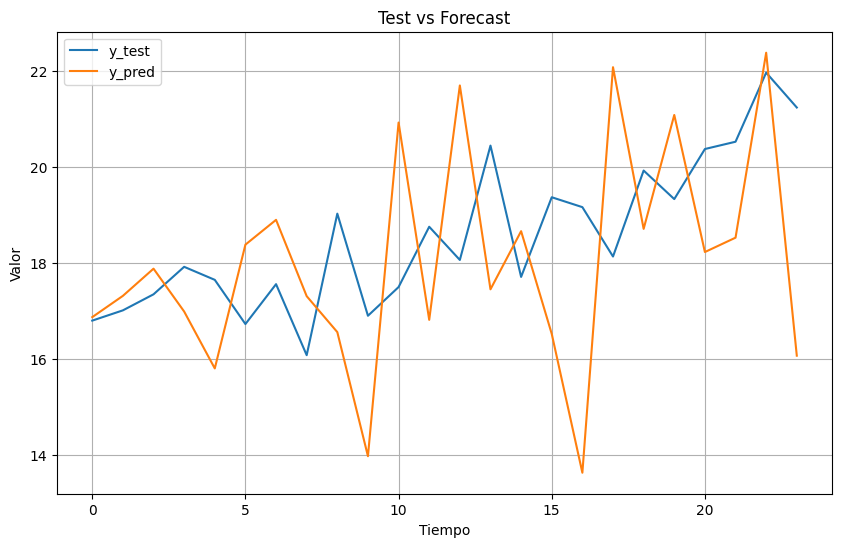

In [29]:
# Test data v time series forecast(pronostico) chart(grafico)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.title('Test vs Forecast')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

Preguntas de comprension:
- Qué es una serie de tiempo y por qué es importante en el análisis de datos?
- Describa brevemente cómo funciona una red neuronal LSTM y cuál es su ventaja para modelar series de tiempo.

- Por qué es importante dividir los datos de serie de tiempo en conjuntos de entrenamiento y prueba?
- ¿Qué hace la función create_dataset en el código?

- Explique la estructura del modelo LSTM creado en el código.
- ¿Qué significan el parámetros epochs en la función fit?

- ¿Por qué es importante evaluar el modelo con datos de prueba después del entrenamiento?
- ¿Qué medida se utiliza para evaluar el rendimiento del modelo en este caso?

- ¿Qué representa la variable y_pred en el código?
- ¿Qué significan los gráficos resultantes de la predicción? ¿Qué conclusiones se pueden sacar de ellos?

- ¿Cómo podría mejorar el rendimiento del modelo LSTM en este caso?
- ¿Qué pasaría si aumentara el número de unidades LSTM o la
cantidad de épocas de entrenamiento?

- ¿Puede pensar en algunos escenarios del mundo real donde el pronóstico de series de tiempo con LSTM podría ser útil?
- ¿Cuáles son algunas industrias o campos que podrían beneficiarse especialmente de esta técnica?

- Modifique los parámetros del modelo LSTM o la serie de tiempo de entrada y observe cómo cambian los resultados de la predicción.
- Intente implementar un modelo diferente para comparar surendimiento con el LSTM. ¿Qué modelo obtiene mejores resultados y por qué?


# FORECAST EXERCISE